In [151]:
import cv2
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.layers import Activation, BatchNormalization

NAME = ["Amir Reza Farokhy, You have access", "Not Recognize, access denied!!!"]

PATH = ["pos", "neg"]
SIZE = (85, 85)

BATCH_SIZE = 16
EPOCHS = 8

def ReadProcessingData(path):
    dataset = []
    for target, p in enumerate(path):
        path_files = os.listdir(p)
        for files in path_files:
            path_files_joins = os.path.join(p, files)
            img = cv2.imread(path_files_joins)
            img = img/255.0 # scalig data
            dataset.append([img, target])

    # shuffle data
    random.shuffle(dataset)

    X = []
    y = []
    for features, target in dataset:
        X.append(features)
        y.append(target)
        
    return np.array(X), np.array(y)


x_train, y_train = ReadProcessingData(PATH)
x_train.shape, y_train.shape

((50000, 85, 85, 3), (50000,))


In [45]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(16))
model.add(Activation("relu"))

# output layer
model.add(Dense(1))
model.add(Activation("sigmoid"))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 83, 83, 32)        896       
                                                                 
 activation_28 (Activation)  (None, 83, 83, 32)        0         
                                                                 
 batch_normalization_10 (Bat  (None, 83, 83, 32)       128       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 83, 83, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 41, 41, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 39, 39, 32)      

In [46]:
hist = model.fit(x_train, y_train, 
                epochs=EPOCHS,
                batch_size=BATCH_SIZE,
                validation_split=0.1)


Epoch 1/8
80/80 [==============================] - 11s 126ms/step - loss: 0.5315 - accuracy: 0.7522 - val_loss: 0.5828 - val_accuracy: 0.6891
Epoch 2/8
80/80 [==============================] - 9s 118ms/step - loss: 0.3522 - accuracy: 0.8342 - val_loss: 1.4781 - val_accuracy: 0.6387
Epoch 3/8
80/80 [==============================] - 9s 117ms/step - loss: 0.1999 - accuracy: 0.8905 - val_loss: 1.0277 - val_accuracy: 0.7311
Epoch 4/8
80/80 [==============================] - 9s 118ms/step - loss: 0.1251 - accuracy: 0.9320 - val_loss: 0.5602 - val_accuracy: 0.8151
Epoch 5/8
80/80 [==============================] - 9s 118ms/step - loss: 0.0891 - accuracy: 0.9601 - val_loss: 0.3192 - val_accuracy: 0.8824
Epoch 6/8
80/80 [==============================] - 9s 117ms/step - loss: 0.0424 - accuracy: 0.9805 - val_loss: 0.2285 - val_accuracy: 0.8992
Epoch 7/8
80/80 [==============================] - 10s 119ms/step - loss: 0.0333 - accuracy: 0.9859 - val_loss: 0.1952 - val_accuracy: 0.9496
Epoch 8/8
8

In [47]:
model.save('my_model.h5')

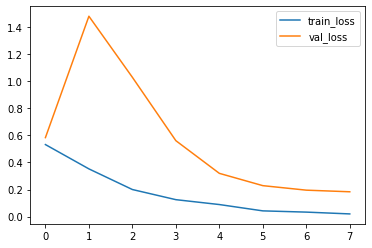

In [48]:
import matplotlib.pyplot as plt
# plot loss function
plt.plot(hist.history["loss"], label="train_loss")
plt.plot(hist.history["val_loss"], label="val_loss")
plt.legend(loc="upper right")
plt.show()

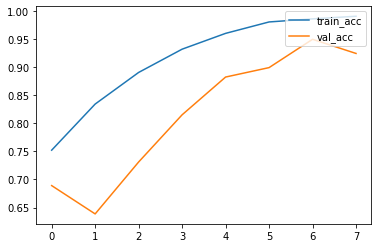

In [49]:
# plot accuracy
plt.plot(hist.history["accuracy"], label="train_acc")
plt.plot(hist.history["val_accuracy"], label="val_acc")
plt.legend(loc="upper right")
plt.show()

In [112]:
NAME = ["Amir Reza Farokhy, You have access", "Not Recognize, access denied!!!"]

test = 'test'

from ImageProcessing import FaceDetections

target_pred = []
for p in os.listdir(test):
    path_test = os.path.join(test, p)
    img = cv2.imread(path_test)
    img = cv2.resize(img, SIZE).astype(np.float32)
    img = img/255.0
    img = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])
    target_pred.append(NAME[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 18ms/step


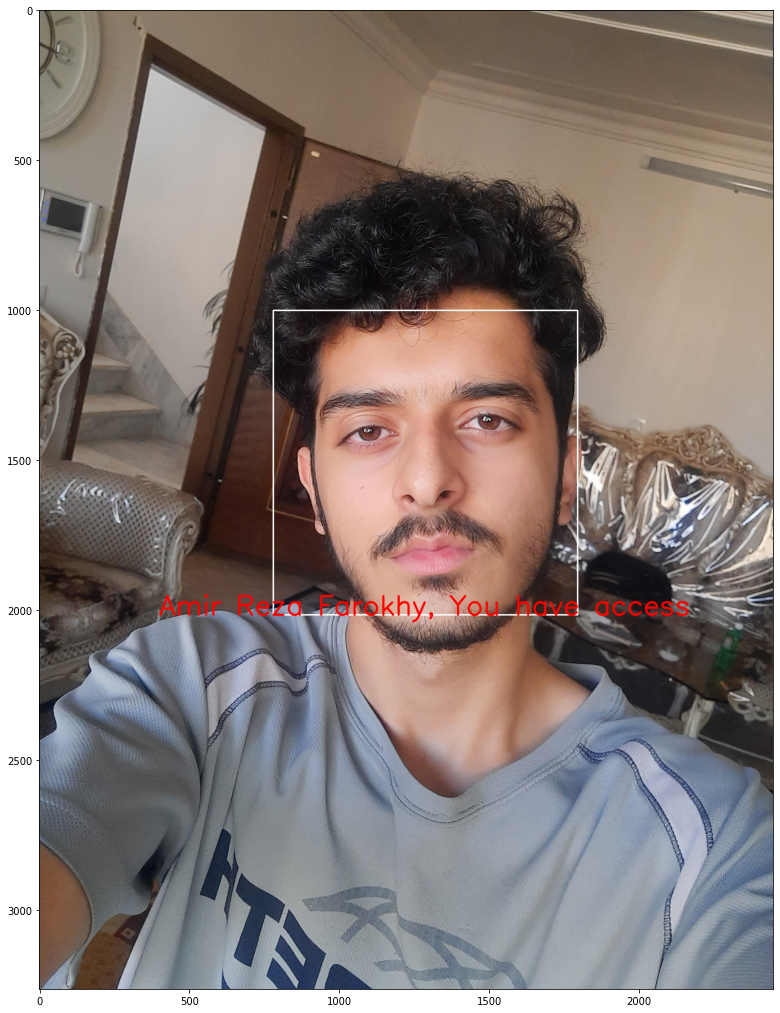

In [150]:
iamge_examples = cv2.imread(f"{test}/son.jpg")
face_pred = FaceDetections(iamge_examples, SIZE)
iamge_examples = face_pred.Predictions(iamge_examples, target_pred[1])
iamge_examples = face_pred.ConvertToRGB(iamge_examples)
plt.figure(figsize=(18, 18))
plt.imshow(iamge_examples)